# 3D Relationship Testing

Testing relationships between 3D structures defined using contours on multiple slices.


In [1]:
# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_slice import *
from structure_set import *
from relations import *

### Global Settings

In [2]:
PRECISION = 2

In [3]:
%matplotlib inline

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/contains simple.png" alt="Contains">
<img src="Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td></tr>
</table></td></tr></table>

### Contains

#### Embedded Spheres
![Embedded Spheres](<Images/FreeCAD Images/Embedded Spheres.png>)

In [4]:
def embedded_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes
    sphere6 = make_sphere(roi_num=1, radius=3, spacing=slice_spacing)
    sphere3 = make_sphere(roi_num=2, radius=1.5, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([sphere6, sphere3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [5]:
slice_table = embedded_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Concentric Cylinders
![Concentric cylinders](<Images/FreeCAD Images/Concentric cylinders.png>)

In [6]:
def simple_cylinders_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.0,
                                  offset_z=0,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder within primary
    contained_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=0.6,
                                                offset_x=0, offset_z=0,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, contained_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [7]:
slice_table = simple_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]

relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Embedded Boxes
![Embedded Boxes](<Images/FreeCAD Images/Embedded Boxes.png>)

In [8]:
def embedded_boxes_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3 = make_box(roi_num=2, width=3, offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([cube6, cube3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [9]:
slice_table = embedded_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Parallel Cylinders
- Concentric cylinders with interior cylinder ending inside the exterior cylinder by one slice

![Parallel Cylinders](<Images/FreeCAD Images/Parallel Cylinders.png>)

In [10]:
def parallel_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10, offset_z=0,
                                  spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                   length=6,
                                                   offset_x=2.5, offset_z=0,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, left_cylinder, right_cylinder,
                            right_middle_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [11]:
slice_table = parallel_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Sphere in Sphere in Sphere
- Hollow spheres with an inner sphere and second structure inside the inner sphere.

![Sphere in Sphere in Sphere](<Images/FreeCAD Images/Sphere in Spheres in Shell.png>)

In [12]:
def nested_spheres_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole10, sphere8, sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [13]:
slice_table = nested_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>


#### Simple Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Simple Surrounded Cylinders](<Images/FreeCAD Images/Surrounded cylinders.png>)

In [14]:
def surrounded_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [15]:
slice_table = surrounded_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Horizontal Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Horizontal Cylinders](<Images/FreeCAD Images/Horizontal Surrounded cylinders.png>)

In [16]:
def surrounded_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [17]:
slice_table = surrounded_horizontal_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Shell
- Hollow sphere with the second structure as an inner sphere.

![Sphere in Shell](<Images/FreeCAD Images/Sphere in Shell.png>)

In [18]:
def sphere_in_shell_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole10, sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [19]:
slice_table = sphere_in_shell_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [20]:
def sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=10, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, left_cylinder, right_cylinder,
                            right_sphere])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [21]:
slice_table = sphere_in_cylinders_in_box_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


## Shelters
<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Shelters</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>

- Surrounds geometry with hole opened to exterior


# Error Recognizing Shelters
- When a hole is opened to the exterior in the z direction, the 2D relations 
  thinks that it is surrounds.
- When a slice contains two distinct contours for the same region, the hull test 
 currently does not encompass both contours.

#### Horizontal Sheltered Cylinder Single Sided
- Cylindrical cup with an interior cylinder ending inside the outer cylinder

![Horizontal Sheltered Cylinder Single Sided](<Images/FreeCAD Images/Horizontal Sheltered Cylinder Single Sided.png>)

In [9]:
def shelters_horizontal_cylinder_single_side_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                              spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=4, length=8,
                                             offset_x=1, offset_z=0,
                                             spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3,
                                                   length=6, offset_x=1,
                                                   spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


**Currently identified as _Contains_**

In [10]:
slice_table = shelters_horizontal_cylinder_single_side_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Horizontal Sheltered Cylinder
- Cylindrical shell with an interior cylinder ending inside the outer cylinder

![Sheltered Horizontal cylinder](<Images/FreeCAD Images/Sheltered Horizontal cylinder.png>)

In [22]:
def shelters_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


**Currently identified as _Disjoint_**

In [23]:
slice_table = shelters_horizontal_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Disjoint


#### Simple Sheltered Vertical Cylinder
- Hollow cylindrical shell with an interior cylinder ending inside the shell

![Sheltered cylinder](<Images/FreeCAD Images/Sheltered cylinder.png>)

In [24]:
def shelters_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            surrounded_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


**Currently identified as _Surrounds_**

In [25]:
slice_table = shelters_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [26]:
def sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=12, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=8, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, left_cylinder, right_cylinder,
                            right_sphere])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

**Currently identified as _Surrounds_**

In [27]:
slice_table = sphere_in_cylinders_in_box_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SHELTERS

Relationship: Surrounds


## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/disjoint.png" alt="Disjoint" style="width: 200px">
</td></tr></table>

#### Disjoint Boxes
![Disjoint Boxes](<Images/FreeCAD Images/Disjoint Boxes.png>)

In [28]:
def disjoint_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-3,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=3,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([left_cube, right_cube, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [29]:
slice_table = disjoint_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


# Error Recognizing disjoint vs surrounds

- When only one structure is present on a slice that structure is external to 
the other.
- Appropriate External and Hull relations must be passed to the relationship.
- Holes that are open to the exterior need to be identified and adjusted appropriately


#### Extended Inner Cylinder
- Concentric hollow cylinder with an interior cylinder extending beyond the outer cylinder's hole by one slice

![Extended Inner Cylinder](<Images/FreeCAD Images/Extended Inner cylinder.png>)

In [70]:
def extended_inner_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=12,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [71]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


In [72]:
selected_slices = slice_table[selected_roi].dropna(how='all')
# Send all slices with both Primary and Secondary contours for standard
# relation testing
mid_relations = list(selected_slices.agg(relate_structures,
                                            structures=selected_roi,
                                            axis='columns'))
[r.identify_relation() for r in mid_relations]

[<RelationshipType.DISJOINT: 1>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.DISJOINT: 1>]

In [73]:
print(mid_relations[0])

|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|



In [74]:
print(mid_relations[5])

|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|



##### Merged Mid relations

> **Surrounds Trumps Disjoint**

In [75]:
print(merged_relations(mid_relations))


|001|	|111|	|111|
|001|	|001|	|001|
|111|	|111|	|111|



In [82]:
print(merged_relations(mid_relations).identify_relation())


Relationship: Surrounds


##### Boundary relations

In [76]:
boundary_relations = get_boundary_relations(regions, selected_roi)
[r.identify_relation() for r in boundary_relations]

[<RelationshipType.DISJOINT: 1>,
 <RelationshipType.DISJOINT: 1>,
 <RelationshipType.DISJOINT: 1>,
 <RelationshipType.DISJOINT: 1>,
 <RelationshipType.DISJOINT: 1>,
 <RelationshipType.DISJOINT: 1>]

In [77]:
print(boundary_relations[0])

|000|	|000|	|000|
|000|	|000|	|000|
|011|	|011|	|011|



In [78]:
print(boundary_relations[1])

|000|	|000|	|000|
|001|	|001|	|001|
|001|	|001|	|001|



In [79]:
print(boundary_relations[2])

|000|	|000|	|000|
|001|	|000|	|000|
|000|	|000|	|000|



In [80]:
print(boundary_relations[3])

|000|	|000|	|000|
|001|	|001|	|001|
|001|	|001|	|001|



##### Merged All relations

> **Boundary Relations are not affecting the outcome**

In [81]:
all_relations = mid_relations.copy()
all_relations.extend(boundary_relations)
relation =  merged_relations(all_relations)
print(relation)

|001|	|111|	|111|
|001|	|001|	|001|
|111|	|111|	|111|



### Add Extended Inner Horizontal Cylinder
- Same as above but with horizontal cylinders

***To Be Done***

#### Disjoint Parallel Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is parallel, but **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<Images/FreeCAD Images/Disjoint Parallel Cylinders.png>)

In [93]:
def parallel_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=25, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_x=10, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder, disjoint_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [94]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


In [95]:
selected_slices = slice_table[selected_roi].dropna(how='all')
# Send all slices with both Primary and Secondary contours for standard
# relation testing
mid_relations = list(selected_slices.agg(relate_structures,
                                            structures=selected_roi,
                                            axis='columns'))
[r.identify_relation() for r in mid_relations]

[<RelationshipType.DISJOINT: 1>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.SURROUNDS: 2>,
 <RelationshipType.DISJOINT: 1>]

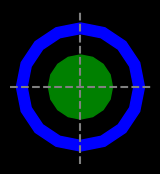

<Axes: >

In [92]:
a = selected_slices.at[0,1].contour
b = selected_slices.at[0,2].contour
plot_ab(a,b)

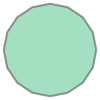

In [99]:
slice_table.at[0,2].contour

In [100]:
type(slice_table.at[0,2])

structure_slice.StructureSlice

In [101]:
type(slice_table.at[0,2].contour)

shapely.geometry.multipolygon.MultiPolygon

In [103]:
len(slice_table.at[0,2].contour.geoms)

1

> **Missing second disjoint cylinder**

#### Disjoint Axial Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is on the same axis as the first, but above, making it **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<Images/FreeCAD Images/Disjoint Axial Cylinders.png>)

In [34]:
def axial_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=30, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_z=12, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, outer_cylinder, cylinder_hole,
                            inner_cylinder, disjoint_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [35]:
slice_table = extended_inner_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Surrounds


#### Disjoint Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Disjoint Concentric Cylinders](<Images/FreeCAD Images/Disjoint Concentric Cylinders.png>)


In [36]:
def disjoint_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder 2 slices above primary cylinder
    upper_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=7,
                                             spacing=slice_spacing)
    # cylinder 2 slices below primary cylinder
    lower_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-7,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, upper_cylinder1,
                            lower_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [37]:
slice_table = disjoint_concentric_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/borders.png" alt="Borders">
<img src="Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td></tr></table>

#### Bordering Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Bordering Concentric Cylinders](<Images/FreeCAD Images/Bordering  Concentric Cylinders.png>)

In [38]:
def bordering_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=6,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-6,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, bordering_cylinder1,
                            bordering_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [39]:
slice_table = bordering_concentric_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes
- Cubes with 'x' faces touching.

![Bordering Lateral Boxes](<Images/FreeCAD Images/Bordering Boxes.png>)


In [40]:
def lateral_borders_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([left_cube, right_cube, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [41]:
slice_table = lateral_borders_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes With Disjoint Box
- Cubes with one touching and one disjoint.

![Bordering Lateral Boxes With Disjoint Box](<Images/FreeCAD Images/Bordering Boxes With Disjoint Box.png>)


In [42]:
def lateral_borders_two_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    disjoint_cube = make_box(roi_num=2, width=2, offset_x=-2,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([left_cube, right_cube, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [43]:
slice_table = lateral_borders_two_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


### Bordering Concentric Cylinder SUP Offset
  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP cylinders with single slice gap at the SUP boundary of the central cylinder.

      
![Bordering Concentric Cylinder SUP Offset](<Images/FreeCAD Images/Bordering Concentric Cylinder SUP Offset.png>)
![Exterior Border SUP](Images/Boundaries/ExteriorBorders2D_SUP.png)

In [44]:
def concentric_cylinders_sup_offset_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=0.2, length=0.4,
                                              offset_z=-0.5,
                                              spacing=slice_spacing)
    sup_cylinder = make_vertical_cylinder(roi_num=2, radius=0.2, length=0.4,
                                          offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, sup_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [45]:
slice_table = concentric_cylinders_sup_offset_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


## Confines (Interior Borders) 

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of 
<span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.

For Interior Borders <span class="b">b</span> 
Should be Within <span class="a">a</span>.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/confines.png" alt="Confines">
<img src="Images/Relationships/confines with island.png" alt="Confines With Island">
</td></tr></table>

### Confines Box embedded in Box

![Box embedded in Box](<Images/FreeCAD Images/Confines Bordering Boxes.png>)

In [46]:
def confined_bordering_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box4 = make_box(roi_num=2, width=4,  spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, box6, hole4, Box4])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [47]:
slice_table = confined_bordering_boxes_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Cylinders

![Confines cylinder](FreeCAD_Scripts/confines_cylinder.png)

In [48]:
def confines_cylinder_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1,
                                    spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5,
                                                length=0.7,
                                                spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.5,
                                        offset_x=-2.5, spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.5,
                                        offset_x=2.5, spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                length=0.5, offset_x=2.5,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, left_hole, right_hole,
                            confines_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [49]:
slice_table = confines_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Embedded Cylinders
  - Primary: Central Cylinder
  - Concentric shorter hole in the center of the primary cylinder
  - Secondary same height as hole but narrower
  - Interior borders at the and bottom of hole.
  
![Confines Embedded Cylinders](<Images/FreeCAD Images/Confines Embedded Cylinder.png>)

In [50]:
def embedded_cylinder_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=4, length=0.8,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                         offset_z=-0.2, spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.6,
                                             offset_z=-0.2,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, center_hole, middle_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [51]:
slice_table = embedded_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Embedded Spheres
   - concentric shells
   - Sphere within shell with inner island
 
![Confines Embedded Spheres](<Images/FreeCAD Images/Confines Embedded Spheres.png>)

In [52]:
def embedded_spheres_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)

    sphere10 = make_sphere(roi_num=2, radius=5, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=2, radius=4, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole10, sphere8, sphere10, hole8])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [53]:
slice_table = embedded_cylinder_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Box in Box on z surface
 - Box in box, touching z plane hole surface only
 
![Confines Box in Box on z surface](<Images/FreeCAD Images/Confines Box in Box on z surface.png>)

In [54]:
def confined_box_z_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_z=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, box6, hole4, Box2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [55]:
slice_table = confined_box_z_border_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Box in Box on Y surface
 - Box in box, touching Y plane hole surface only
 
![Confines Box in Box on Y surface](<Images/FreeCAD Images/Confines Box in Box on y surface.png>)

In [56]:
def confined_box_y_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_y=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, box6, hole4, Box2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [57]:
slice_table = confined_box_y_border_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


## Partition

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Partition</th><th></th></tr>
<td class="d" colspan="2">
The boundaries of <span class="a">a</span> and <span class="b">b</span> have more than one point in common.
No points of <span class="b">b</span> are exterior to <span class="a">a</span>, and some points in <span class="a">a</span> are exterior to <span class="b">b</span>.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/partitions simple.png" alt="Partition">
<img src="Images/Relationships/partitions archipelago with island.png" alt="Partition With Island">
<img src="Images/Relationships/partitions partial ring.png" alt="Partition Ring">
</td></tr></table>

**Partition**

- half shell

### Partition Box in Box on Y surface
 - Box part of box, touching Y plane surface only
 
![Partition Box in Box on Y surface](<Images/FreeCAD Images/Partition Box in Box on y surface.png>)

In [58]:
def partition_embedded_box_on_y_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=3, height=6, offset_y=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([box6, box6_3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [59]:
slice_table = partition_embedded_box_on_y_surface()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


### Partition Box in Box on Z surface
 - Box part of box, touching Z plane surface only
 
![Partition Box in Box on Z surface](<Images/FreeCAD Images/Partition Box in Box on z surface.png>)

In [60]:
def partition_embedded_box_on_z_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30,
                                  spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=6, height=3, offset_z=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([box6, box6_3, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [61]:
slice_table = partition_embedded_box_on_z_surface()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Horizontal Cylinders

![Horizontal Cylinders](./Images/FreeCAD%20Images/HorizontalCylinders.png)

In [62]:
def horizontal_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=6, length=6, height=8, offset_z=-4,
                    spacing=slice_spacing)
    cylinder2h = make_horizontal_cylinder(radius=2, length=5, roi_num=1,
                                          spacing=slice_spacing)
    cylinder1h = make_horizontal_cylinder(radius=1, length=5, roi_num=2,
                                          spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder1h, cylinder2h])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [63]:
slice_table = horizontal_cylinders()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


 #### Vertical Concentric Cylinders
 
 ![Concentric Cylinders](./Images/FreeCAD%20Images/ConcentricCylinders.png)

In [64]:
def vertical_concentric_cylinders():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    cylinder6 = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                    spacing=slice_spacing)
    cylinder4 = make_vertical_cylinder(roi_num=2, radius=4, length=10,
                                    spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cylinder6, cylinder4])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [65]:
slice_table = vertical_concentric_cylinders()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders starting on the same slice
  
<img src="Images\Boundaries\PartitionSup3D.png" alt="PartitionSup3D" style="height:50px;">
<img src="Images\Boundaries\PartitionSup2D.png" alt="PartitionSup2D" style="height:30px;">

In [66]:
def concentric_cylinders_same_start():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7,
                                              offset_z=-3.5,
                                              spacing=slice_spacing)
    sup_partition = make_vertical_cylinder(roi_num=2, radius=1, length=3.0,
                                           offset_z=-1.5,
                                           spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, sup_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [67]:
slice_table = concentric_cylinders_same_start()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders ending on the same slice.

<img src="Images\Boundaries\PartitionInf3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\PartitionInf2D.png" alt="PartitionInf2D" style="height:30px;">

In [68]:
def concentric_cylinders_same_end():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=10,
                                  spacing=slice_spacing)
    # Concentric cylinders ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7.0,
                                              offset_z=3.5,
                                              spacing=slice_spacing)
    inf_partition = make_vertical_cylinder(roi_num=2, radius=1, length=4,
                                           offset_z=2, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, inf_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [69]:
slice_table = concentric_cylinders_same_end()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders starting and ending on the same slice.

<img src="Images\Boundaries\Partition3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="Images\Boundaries\Partition2D.png" alt="PartitionInf2D" style="height:30px;">

In [70]:
def concentric_cylinders_same_start_end():
    slice_spacing = 0.05
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting and ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=0.0,
                                              spacing=slice_spacing)
    mid_partition = make_vertical_cylinder(roi_num=2, radius=1, length=0.7,
                                           offset_z=-0.0, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, mid_partition])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [71]:
slice_table = concentric_cylinders_same_start_end()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


### Partition Sphere Island
   - concentric shells
   - 2nd structure matches inner island
 
![Partition Sphere Island](<Images/FreeCAD Images/Partition Sphere Island.png>)

In [72]:
def partition_sphere_island_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere4 = make_sphere(roi_num=1, radius=2, spacing=slice_spacing)

    sphere4_2 = make_sphere(roi_num=2, radius=2, spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, sphere12, hole8, sphere4, sphere4_2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [73]:
slice_table = partition_sphere_island_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


## Overlaps

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td></tr></table>

### Overlapping Spheres 

![Overlapping Spheres](<Images/FreeCAD Images/Overlapping Spheres.png>)

In [74]:
def overlapping_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    right_sphere6 = make_sphere(roi_num=1, radius=6, offset_x=-2,
                                spacing=slice_spacing)
    left_sphere6 = make_sphere(roi_num=2, radius=6, offset_x=2,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, right_sphere6, left_sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [75]:
slice_table = overlapping_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Boxes in the Y Direction 

![Overlapping Boxes in the Y Direction](<Images/FreeCAD Images/Overlapping Boxes in Y direction.png>)

In [76]:
def overlapping_boxes_y():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_y=0.2,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([box6, box6_y, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [77]:
slice_table = overlapping_boxes_y()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Boxes in the Z Direction 

![Overlapping Boxes in the Z Direction](<Images/FreeCAD Images/Overlapping Boxes in Z direction.png>)

In [78]:
def overlapping_boxes_z():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.3,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([box6, box6_y, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [79]:
slice_table = overlapping_boxes_z()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Stacked Boxes

![Stacked Boxes](<Images/FreeCAD Images/Stacked Boxes.png>)

In [80]:
def stacked_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.6,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([box6, box6_y, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table

In [81]:
slice_table = stacked_boxes()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

- Cylinders are overlapping because they have a contour on the same slices (-0.4, and 0.4).

![Overlapping Concentric Cylinders](<Images/FreeCAD Images/Overlapping Concentric Cylinders.png>)


In [82]:
def overlapping_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=5,
                                             spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-5,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, overlapping_cylinder1,
                            overlapping_cylinder2])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [83]:
slice_table = overlapping_concentric_cylinders_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Cubes INF RT

![Overlapping Cubes INF RT](<Images/FreeCAD Images/Overlapping Cubes INF RT.png>)

In [84]:
def overlapping_cubes_inf_rt():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf_rt = make_box(roi_num=2, width=6, offset_z=3, offset_x=3,
                            offset_y=3, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([body, cube6, cube6_inf_rt])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [85]:
slice_table = overlapping_cubes_inf_rt()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Extended Cylinder

![Overlapping Extended Cylinder](<Images/FreeCAD Images/Overlapping Extended Cylinder.png>)

In [97]:
def overlapping_extended_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              spacing=slice_spacing)
    # cylinder with interior borders
    overlapping_cylinder = make_vertical_cylinder(roi_num=2, radius=3,
                                                  length=0.9,
                                                  spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, primary_cylinder, overlapping_cylinder])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [ ]:
slice_table = overlapping_extended_cylinder()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


# Done to Here

## Equals

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Equals</th><th>Symmetric, Transitive</th></tr>
<td class="d" colspan="2">
The interiors of <span class="a">a</span> and <span class="b">b</span> 
intersect and no part of the interior of one geometry intersects the exterior of the other.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/equals.png" alt="Equals">
</td></tr></table>

### Equal Spheres 


In [101]:
def equal_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    a_sphere6 = make_sphere(roi_num=1, radius=6,
                                spacing=slice_spacing)
    b_sphere6 = make_sphere(roi_num=2, radius=6,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = pd.concat([body, a_sphere6, b_sphere6])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [102]:
slice_table = equal_spheres_example()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Equals


### Equal Boxes 


In [268]:
def equal_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    a_box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    b_box6 = make_box(roi_num=2, width=0.6, spacing=slice_spacing)
    # combine the contours
    slice_data = pd.concat([a_box6, b_box6, body])
    # convert contour slice data into a table of slices and structures
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [269]:
slice_table = equal_boxes()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Equals


### Equal box created by cropping a larger box.

In [326]:
def equal_boxes_by_crop():
    def apply_crop(p):
        # polygon made from offset boxed resulting in a 4x4 square hole in the
        # middle.
        left_xy_points = box_points(width=0.8, offset_x=0.6, offset_y=0)
        left_crop = shapely.Polygon(left_xy_points)
        right_xy_points = box_points(width=0.8, offset_x=-0.6, offset_y=0)
        right_crop = shapely.Polygon(right_xy_points)
        up_xy_points = box_points(width=0.8, offset_x=0, offset_y=0.6)
        up_crop = shapely.Polygon(up_xy_points)
        down_xy_points = box_points(width=0.8, offset_x=0, offset_y=-0.6)
        down_crop = shapely.Polygon(down_xy_points)
        crop_poly = shapely.union_all([left_crop, right_crop,
                                       up_crop, down_crop])
        cropped = p - crop_poly
        return poly_round(cropped)

    slice_spacing = 0.1
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    box8 = make_box(roi_num=1, width=0.8, spacing=slice_spacing)
    box4 = make_box(roi_num=2, width=0.4, spacing=slice_spacing)

    poly_a = box8.loc[(slice(None), slice(-0.2, 0.2)), :].copy()
    poly_a.Contour = poly_a.Contour.apply(apply_crop)
    slice_data = pd.concat([poly_a, box4, body])
    slice_table = make_slice_table(slice_data, ignore_errors=True)
    return slice_table


In [327]:
slice_table = equal_boxes_by_crop()
regions = generate_region_graph(slice_table)
selected_roi = [1, 2]
relation = find_relations(slice_table, regions, selected_roi)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Equals
